In [130]:
import minisom 
import pandas as pd
import sklearn
import matplotlib
import numpy as np

In [131]:
pd.__version__, sklearn.__version__, matplotlib.__version__, np.__version__

('2.2.2', '1.5.1', '3.9.2', '1.26.4')

In [132]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [133]:
data = pd.read_csv('../data/credit/credit_data.csv')
data

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [134]:
data.isna().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [135]:
data = data.dropna()

In [136]:
data.isna().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [137]:
data.shape

(1997, 5)

In [138]:
data.loc[data['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [139]:
data['age'].mean()

40.80755937840458

In [140]:
data.loc[data['age']>0].mean()

clientid     1003.431795
income      45328.856915
age            40.927700
loan         4443.240892
default         0.141926
dtype: float64

In [141]:
data.loc[data.age < 0, 'age'] = 40.93

In [142]:
data.loc[data['age']<0]

,clientid,income,age,loan,default


In [143]:
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values


In [144]:
X.shape

(1997, 4)

In [145]:
som = MiniSom(x=15, y=15, input_len=4, random_seed=0)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

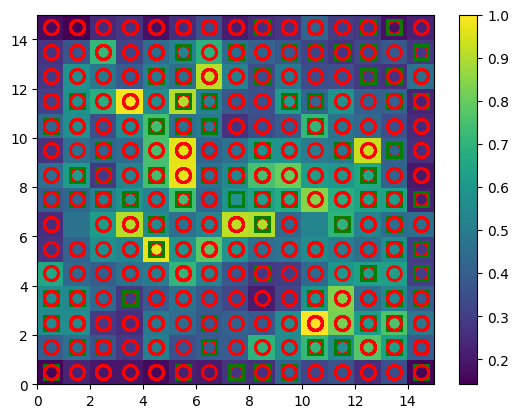

In [146]:
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, w[1] + 0.5, markers[int(y[i])],
       markerfacecolor = 'None', markersize = 10,
       markeredgecolor = colors[y[i]], markeredgewidth = 2)